<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/Fuzzy-logic-and-ML/blob/main/Blood_flow_animatioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Установка и загрузка библиотек

Fastai

In [79]:
!pip install -Uqq fastbook
!pip install imageio
import fastbook
fastbook.setup_book()

In [80]:
from fastai.vision.all import*
import cv2
from google.colab.patches import cv2_imshow
import imageio

#Исходные данные

##Настройки

Визуализация

In [81]:

fig_size = (5,5)
img_map = 'Blues'#'gray','Blues'
img_slice = [0, 100, 0, 100]

Путь

In [82]:
path = Path('/content/gdrive/MyDrive/work/Fuzzy_logic_and_ML/Blood_count_Toy_dataset/lmg_f_16.02.2022_2p5_gc')
path

Path('/content/gdrive/MyDrive/work/Fuzzy_logic_and_ML/Blood_count_Toy_dataset/lmg_f_16.02.2022_2p5_gc')

Чтение содержимого папки

In [111]:
#?get_image_files

In [ ]:
fnames = sorted(get_image_files(path))
fnames

In [101]:
len(fnames), type(fnames)

(100, fastcore.foundation.L)

#Вывод изображений на экран

С помощью библиотеки PIL (Python image library)

In [85]:
img = Image.open(fnames[0])
#img

С помощью numpy (np), opencv (cv2) и matplotlib (plt)

In [86]:
img1 = np.uint32(cv2.imread(str(fnames[0])))
img1.shape, type(img1)

((1000, 1000, 3), numpy.ndarray)

Text(0.5, 1.0, 'Red filter')

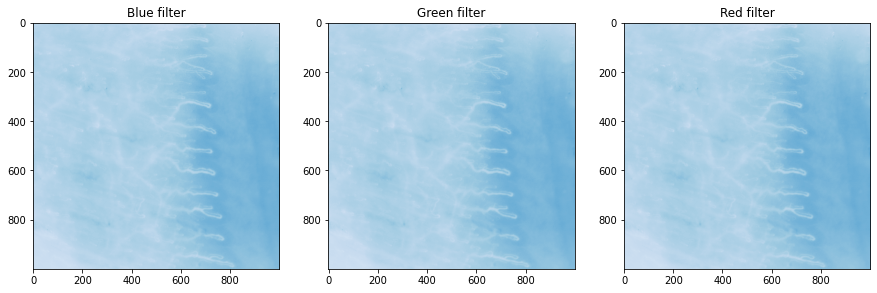

In [87]:
plt.figure(figsize = (fig_size[0]*3,fig_size[1]))

plt.subplot(1,3,1)
plt.imshow(img1[:,:,0], cmap = img_map)
plt.title('Blue filter')

plt.subplot(1,3,2)
plt.imshow(img1[:,:,1], cmap = img_map)
plt.title('Green filter')

plt.subplot(1,3,3)
plt.imshow(img1[:,:,2], cmap = img_map)
plt.title('Red filter')

#Анимация

In [ ]:
  for o in fnames:
    print(o)

In [ ]:
for o in range(len(fnames)):
  print(fnames[o])

In [118]:
with imageio.get_writer("blood_flow.gif", mode="I") as writer:
  for o in fnames:
    img = np.uint8(cv2.imread(str(o)))
    img_slice = img[0:100,0:100,:]
    writer.append_data(img_slice)
    #print(o)